In [1]:
import csv
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks

import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

import tensorflow as tf

In [2]:
# f = open('movie_metadata.csv', 'r')
# data = f.read()
# split_rows = data.split('\n')
# movie_data = []
# for row in split_rows:
#     split_row = row.split(',')
#     movie_data.append(split_row)

In [3]:
data = pd.read_csv('movie_metadata.csv')

In [4]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
# data.columns

In [6]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [7]:
# We can see there are lot of NaNs present in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [8]:
# Let's see how does the data size drops on dropping NaNs
## records with at least 25 non-NaN values
data1 = data.dropna(thresh=25)
print('Shape of data with NaNs: ', data.shape, '\nShape of the data aftyer removing NaNs: ', data1.shape)

Shape of data with NaNs:  (5043, 28) 
Shape of the data aftyer removing NaNs:  (4846, 28)


#### We see that removing all NaNs drops 1287 records, which is clearly ove 25% of the records and can seriously hamper our precting ability.

In [11]:
# data.dtypes

In [12]:
# Number of NaNs in respective columns

# data.isnull().sum()

#### Let's drop the 'aspect_ratio' and 'movie_imdb_link' variables, as they do not seem useful for rating prediction.

In [9]:
### Defining our labels for the problem

labels = data["imdb_score"]
data.drop(["imdb_score", "aspect_ratio", "movie_imdb_link"], inplace=True, axis=1)

In [10]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes',
       'movie_facebook_likes'],
      dtype='object')

In [11]:
numeric_features=data._get_numeric_data().columns.values.tolist()

In [12]:
text_features=data.columns.values.tolist()
text_features=[i for i in text_features if i not in numeric_features]

In [13]:
string_features=["movie_title", "plot_keywords"]

categorical_features=[i for i in text_features if i not in string_features]

In [14]:
numeric_features.remove("title_year") 
categorical_features.append("title_year")

In [15]:
### Title_year  is categorical
### all the others can be considered continuous 
### (See about facenumber_in_poster too)

In [16]:
# numeric_features

In [17]:
# text_features

In [18]:
# string_features

In [19]:
# categorical_features

## Visualizations

In [20]:
data['country'].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [21]:
def counting(df, column):
    value_count = {}
    for row in df[column].dropna():
        if row in value_count:
            value_count[row] += 1
        else:
            value_count[row] = 1
    return value_count

In [22]:
countries = pd.Series(counting(data, 'country'))

<BarContainer object of 65 artists>

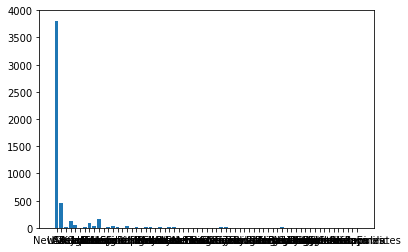

In [23]:
plt.bar(countries.index, countries)

In [24]:
countries.sort_values(ascending=False, axis=0)

USA                     3807
UK                       448
France                   154
Canada                   126
Germany                   97
Australia                 55
India                     34
Spain                     33
China                     30
Italy                     23
Japan                     23
Mexico                    17
Hong Kong                 17
New Zealand               15
South Korea               14
Ireland                   12
Russia                    11
Denmark                   11
South Africa               8
Brazil                     8
Norway                     8
Sweden                     6
Thailand                   5
Netherlands                5
Poland                     5
Iran                       4
Argentina                  4
Israel                     4
Belgium                    4
Romania                    4
                        ... 
Greece                     2
Taiwan                     2
Chile                      1
Finland       

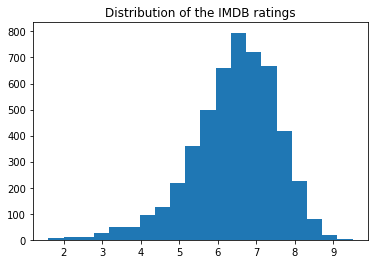

In [28]:
plt.hist(labels, bins=20)
plt.title("Distribution of the IMDB ratings")
plt.show()

In [29]:
# Imputation of missing numeric_features. 

## we use standard scaler to keep as much variance as possible (compared to minmax)
impute=Imputer(missing_values='NaN',strategy="most_frequent", axis=0)
data[numeric_features]=impute.fit_transform(data[numeric_features])

scl=StandardScaler()
data[numeric_features]=scl.fit_transform(data[numeric_features])

data[numeric_features].head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,movie_facebook_likes
0,4.797503,2.814318,-0.241367,0.125431,-0.369902,11.160073,5.795674,-0.267871,-0.679747,7.369256,1.016877,-0.176884,1.318632
1,1.340129,2.456819,-0.039256,0.212714,2.228319,4.168026,2.798784,2.128121,-0.679747,2.559467,1.338521,0.829814,-0.389572
2,3.803816,1.622653,-0.241367,-0.292328,0.296309,2.473418,1.388010,0.110172,-0.182725,1.913218,1.057721,-0.311391,4.010348
3,5.536609,2.258208,7.656405,13.455777,1.362246,6.318278,7.659834,5.344122,-0.679747,6.434314,1.083248,5.288616,8.099687
4,-1.131770,-0.681231,-0.194340,0.212714,-0.427796,-0.581219,-0.604169,-0.526157,-0.679747,-0.716805,-0.091008,-0.405769,-0.389572


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72bc9cd400>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

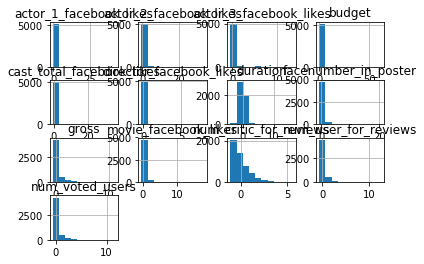

In [31]:
# This plot of all the numerical variables' histogram together justifies 'most frequest' strategy to impute the data above

# from matplotlib.pyplot import figure
# figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')

plt.figure()
data[numeric_features].hist()
# plt.hist(data[numeric_features], bins=1000)

In [33]:
import operator

from scipy.stats import pearsonr
correl={}
for f in numeric_features:
    correl[f]=pearsonr(data[f], labels)
sorted_cor = sorted(correl.items(), key=operator.itemgetter(1), reverse=True)
print (sorted_cor)

[('num_voted_users', (0.4109652002703472, 8.561420234981293e-205)), ('num_critic_for_reviews', (0.2997128320107673, 3.499917497993284e-105)), ('num_user_for_reviews', (0.28978692443885773, 3.7438372081606225e-98)), ('duration', (0.2610706485657786, 2.2913365138738415e-79)), ('movie_facebook_likes', (0.24704851902725028, 5.26928820566599e-71)), ('gross', (0.17636050188406846, 1.6379676123144198e-36)), ('director_facebook_likes', (0.16246759578590034, 3.5875676939989255e-31)), ('cast_total_facebook_likes', (0.08578734754800735, 1.0484736266089975e-09)), ('actor_2_facebook_likes', (0.08355072713369639, 2.812236914134845e-09)), ('actor_1_facebook_likes', (0.07586676050935895, 6.888788561799105e-08)), ('actor_3_facebook_likes', (0.05279597934518547, 0.0001761695769764363)), ('budget', (0.02735720739697167, 0.05206100536210327)), ('facenumber_in_poster', (-0.062210931032976265, 9.822719464157489e-06))]


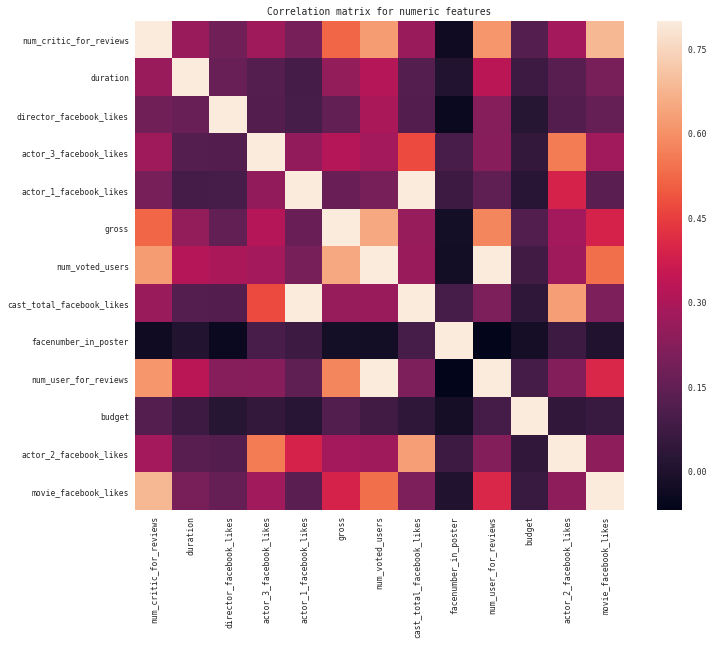

In [36]:
# Correlation amongst numerical values

import seaborn as sns
import matplotlib.pyplot as plt
def corrmap(features, title):
    sns.set(context="paper", font="monospace")
    corrmat = data[features].corr()
    f, ax = plt.subplots(figsize=(12, 9))
    plt.title(title)#, **title_font)
# Draw the heatmap using seaborn
    sns.heatmap(corrmat, vmax=.8, square=True)
corrmap(numeric_features,"Correlation matrix for numeric features")

##### Observation 1:
The actors' total facebook likes are highly correlated withy the cast_total_facebook_likes, so we just make 2 categories, 'actor_1_fb_likes' and 'other_actor_fb_likes' 

##### Observation 2:
Significant correlation between the num_voted_users and the number of reviews from both 'critics' and 'users', the gross and the movie_facebook_likes.
So let's create a new variable as mean of all these indicating the 'movie_success'.

In [43]:
data["movie_success"]=(data['num_critic_for_reviews']+data["num_voted_users"]
                +data["num_user_for_reviews"]+data["gross"]+data["movie_facebook_likes"])/6

data["other_actors_facebook_likes"]=data["actor_2_facebook_likes"]+data["actor_3_facebook_likes"]

num_features_2=[x for x in numeric_features if x not in ["cast_total_facebook_likes",
                                                         'num_critic_for_reviews',
                                                         "num_voted_users",
                                                         "num_user_for_reviews",
                                                        "gross","movie_facebook_likes",
                                                        "actor_2_facebook_likes",
                                                        "actor_3_facebook_likes"]]
num_features_2.extend(["movie_success", "other_actors_facebook_likes"])

In [44]:
# The statistical summary of these 4 variables justify Observation 2 above
data[['num_critic_for_reviews','num_voted_users','gross','movie_facebook_likes']].describe()

,num_critic_for_reviews,num_voted_users,gross,movie_facebook_likes
count,5043.000000,5.043000e+03,5.043000e+03,5.043000e+03
mean,0.000000,2.254349e-17,-6.763048e-17,1.127175e-17
std,1.000099,1.000099e+00,1.000099e+00,1.000099e+00
min,-1.131770,-6.041904e-01,-6.277160e-01,-3.895723e-01
25%,-0.745793,-5.421668e-01,-5.812187e-01,-3.895723e-01
50%,-0.244843,-3.560960e-01,-3.908845e-01,-3.809795e-01
75%,0.453202,9.128837e-02,1.683127e-01,-2.342810e-01
max,5.536609,1.159874e+01,1.116007e+01,1.767598e+01


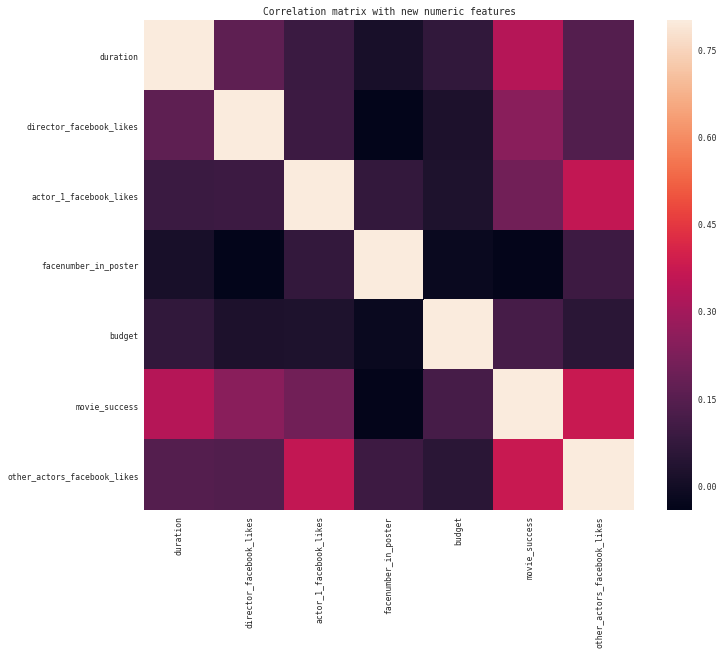

In [45]:
# Correlation map of new features
corrmap(num_features_2, "Correlation matrix with new numeric features")

In [47]:
import operator

from scipy.stats import pearsonr
correl={}
for f in num_features_2:
    correl[f]=pearsonr(data[f], labels)
sorted_cor = sorted(correl.items(), key=operator.itemgetter(1), reverse=True)
print (sorted_cor)

[('movie_success', (0.34937713438252105, 1.0101947957161183e-144)), ('duration', (0.2610706485657786, 2.2913365138738415e-79)), ('director_facebook_likes', (0.16246759578590034, 3.5875676939989255e-31)), ('other_actors_facebook_likes', (0.07721012413561174, 4.0229082089507694e-08)), ('actor_1_facebook_likes', (0.07586676050935895, 6.888788561799105e-08)), ('budget', (0.02735720739697167, 0.05206100536210327)), ('facenumber_in_poster', (-0.062210931032976265, 9.822719464157489e-06))]


In [51]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(max_features="sqrt")
parameters={ "max_depth":[5,8,25], 
             "min_samples_split":[2,5], "n_estimators":[800,1200]}

In [52]:
from sklearn.grid_search import GridSearchCV
clf = GridSearchCV(RFR, parameters)
clf.fit(data[num_features_2],labels)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 8, 25], 'min_samples_split': [2, 5], 'n_estimators': [800, 1200]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [54]:
# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=operator.itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")
report(clf.grid_scores_)

Rank: 1
Mean validation score: 0.329 (std: 0.078)
Parameters: {'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 1200}

Rank: 2
Mean validation score: 0.329 (std: 0.076)
Parameters: {'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 800}

Rank: 3
Mean validation score: 0.328 (std: 0.075)
Parameters: {'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 1200}



In [56]:
for feat in categorical_features:
    data=pd.concat([data, pd.get_dummies(data[feat], prefix=feat, dummy_na=True)],axis=1)

In [58]:
cat_dummies=[i for i in data.columns.values.tolist() if i not in numeric_features]
cat_dummies=[i for i in cat_dummies if i not in text_features]
cat_dummies.remove("title_year")
cat_dummies[-5:]

['title_year_2013.0',
 'title_year_2014.0',
 'title_year_2015.0',
 'title_year_2016.0',
 'title_year_nan']

In [61]:
len(cat_dummies)

12197

In [63]:
correl={}
for f in cat_dummies:
    correl[f]=pearsonr(data[f], labels)
sorted_cor = sorted(correl.items(), key=operator.itemgetter(1), reverse=True)

print (sorted_cor[0:10])
print("")
print (sorted_cor[-10:])

/home/mrigank/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


[('movie_success', (0.34937713438252105, 1.0101947957161183e-144)), ('color_ Black and White', (0.14511424068479978, 3.8707674842160452e-25)), ('director_name_nan', (0.14265081749456854, 2.4404929097356446e-24)), ('genres_Drama', (0.09535203204148157, 1.1598805916698524e-11)), ('genres_Crime|Drama', (0.09021020331615656, 1.3835331053803418e-10)), ('genres_Drama|Romance', (0.0780356144939473, 2.8777460103141966e-08)), ('other_actors_facebook_likes', (0.07721012413561174, 4.0229082089507694e-08)), ('director_name_Christopher Nolan', (0.07025603635548693, 5.910990339111362e-07)), ('director_name_Martin Scorsese', (0.06830892326957612, 1.2016533611115477e-06)), ('director_name_Steven Spielberg', (0.06646178109547822, 2.315057531355703e-06))]

[('actor_3_name_Dave Allen', (-0.05563238329974575, 7.72534405357354e-05)), ('actor_3_name_Peter Wingfield', (-0.056859715462759385, 5.342655319313694e-05)), ('actor_3_name_Jennifer Sky', (-0.05685971546275939, 5.342655319313694e-05)), ('genres_Thrill

In [64]:
predictors=["movie_success","duration","director_facebook_likes", "title_year_nan", 
            "color_ Black and White",
            "director_name_nan", "country_UK", "content_rating_TV-MA", "genres_Drama",
            "genres_Crime|Drama", 'other_actors_facebook_likes','actor_1_facebook_likes',
           "content_rating_Approved", "genres_Drama|Romance", "title_year_2015.0", 
           "director_name_Jason Friedberg","genres_Horror","genres_Comedy|Romance","director_name_Uwe Boll", "country_USA","content_rating_PG-13","color_Color", "language_English"]

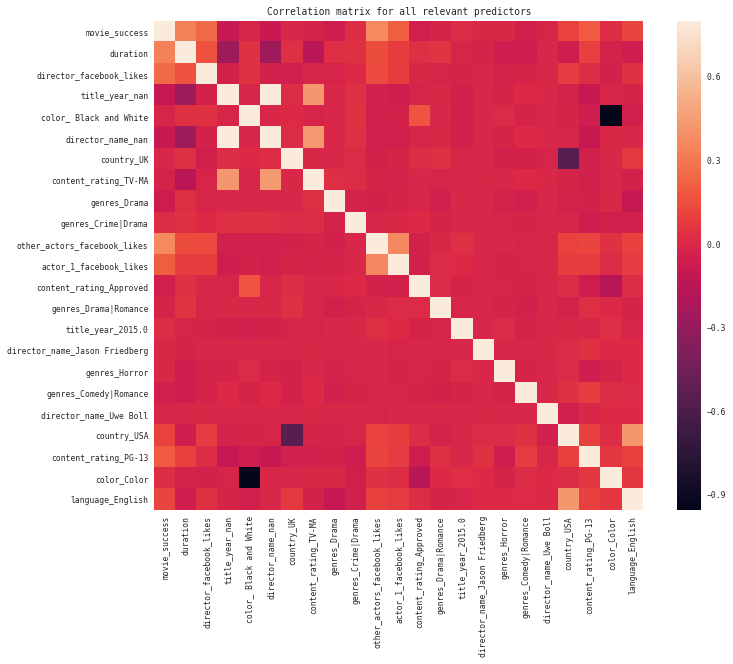

In [65]:
corrmap(predictors, "Correlation matrix for all relevant predictors")


In [66]:
predictors=["movie_success","duration","director_facebook_likes", "title_year_nan", 
            "color_ Black and White",
             "content_rating_TV-MA", "genres_Drama",
            "genres_Crime|Drama", 'other_actors_facebook_likes','actor_1_facebook_likes',
           "content_rating_Approved", "genres_Drama|Romance", "title_year_2015.0", 
           "director_name_Jason Friedberg","genres_Horror","genres_Comedy|Romance","director_name_Uwe Boll",
            "country_USA","content_rating_PG-13", "language_English"]

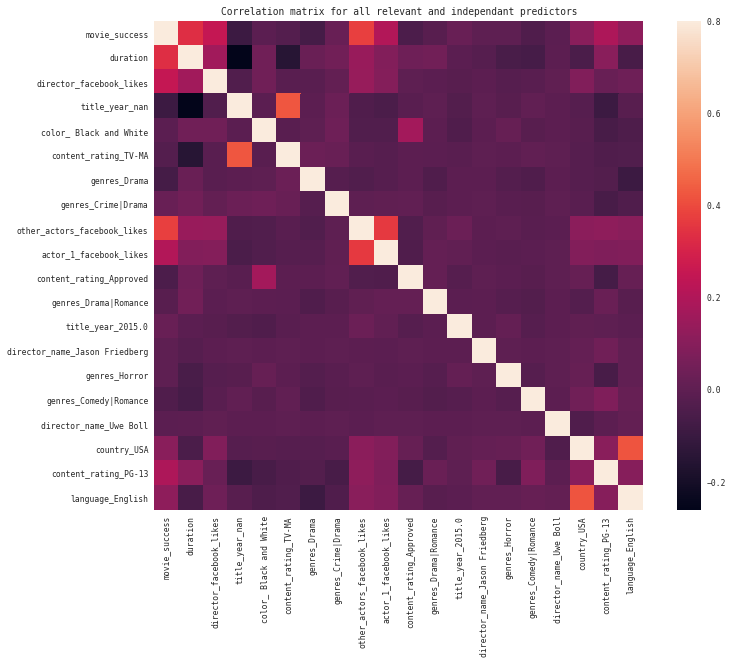

In [67]:
corrmap(predictors, "Correlation matrix for all relevant and independant predictors")


In [70]:
RFR=RandomForestRegressor(max_features="sqrt")
parameters={ "max_depth":[5,8,25], 
             "min_samples_split":[2,5], "n_estimators":[800,1200]}
from sklearn.grid_search import GridSearchCV
clf = GridSearchCV(RFR, parameters)
clf.fit(data[predictors],labels)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 8, 25], 'min_samples_split': [2, 5], 'n_estimators': [800, 1200]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [71]:
report(clf.grid_scores_)

Rank: 1
Mean validation score: 0.292 (std: 0.091)
Parameters: {'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 800}

Rank: 2
Mean validation score: 0.292 (std: 0.089)
Parameters: {'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 800}

Rank: 3
Mean validation score: 0.292 (std: 0.090)
Parameters: {'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 1200}



### Investigating the plot_keywords

In [75]:
data["plot_keywords"]=data["plot_keywords"].fillna("None")

def token(text):
    return(text.split("|"))

cv=CountVectorizer(max_features=200,tokenizer=token )
plot_keywords_words=cv.fit_transform(data["plot_keywords"])

plot_keywords_words=plot_keywords_words.toarray()

words = cv.get_feature_names()
words=["Keyword_"+w for w in words]

keywords=pd.DataFrame(plot_keywords_words, columns=words)

In [76]:
keys=[w for w in words if keywords[w].sum()>80] 
### takes the keywords that concern at least 80 (totally arbitrary) of the movies
len(keys)

9

In [85]:
keys

['Keyword_alien',
 'Keyword_death',
 'Keyword_friend',
 'Keyword_high school',
 'Keyword_love',
 'Keyword_murder',
 'Keyword_new york city',
 'Keyword_none',
 'Keyword_police']

In [78]:
data=pd.concat([data, keywords[keys]],axis=1)

In [80]:
num_cat_key_feat=predictors+keys
import operator

from scipy.stats import pearsonr
correl={}
for f in keys:
    correl[f]=pearsonr(data[f], labels)
sorted_cor = sorted(correl.items(), key=operator.itemgetter(1), reverse=True)

print (sorted_cor[0:10])
print (sorted_cor[-10:])

[('Keyword_friend', (0.029938629225058334, 0.03350211130100427)), ('Keyword_police', (0.025285837308578436, 0.07257527103438378)), ('Keyword_love', (0.017657803131527695, 0.20993667392338783)), ('Keyword_death', (0.01130269456415836, 0.42227700238452825)), ('Keyword_new york city', (-0.009976783986355951, 0.4787377676198852)), ('Keyword_high school', (-0.010107273539675297, 0.47300447511436383)), ('Keyword_alien', (-0.02251484112423155, 0.10989237356513103)), ('Keyword_murder', (-0.022643202938536132, 0.10788034676015495)), ('Keyword_none', (-0.05492492242541858, 9.523497295247868e-05))]
[('Keyword_friend', (0.029938629225058334, 0.03350211130100427)), ('Keyword_police', (0.025285837308578436, 0.07257527103438378)), ('Keyword_love', (0.017657803131527695, 0.20993667392338783)), ('Keyword_death', (0.01130269456415836, 0.42227700238452825)), ('Keyword_new york city', (-0.009976783986355951, 0.4787377676198852)), ('Keyword_high school', (-0.010107273539675297, 0.47300447511436383)), ('Key

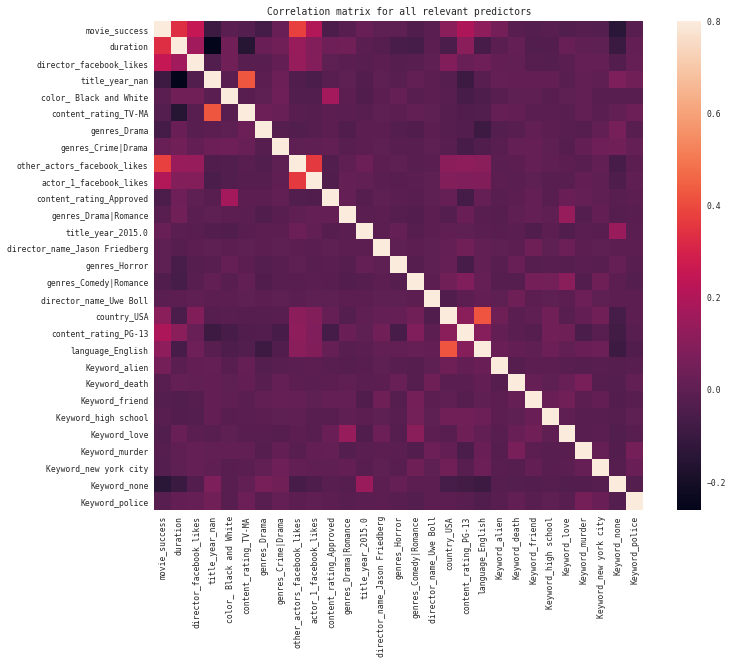

In [81]:
corrmap(predictors+keys, "Correlation matrix for all relevant predictors")

In [83]:

RFR=RandomForestRegressor(max_features="sqrt")
parameters={ "max_depth":[2,5,8,25], 
             "min_samples_split":[2,5], "n_estimators":[800,1200]}

clf = GridSearchCV(RFR, parameters)
clf.fit(data[num_cat_key_feat],labels)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 5, 8, 25], 'min_samples_split': [2, 5], 'n_estimators': [800, 1200]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [84]:
report(clf.grid_scores_)

Rank: 1
Mean validation score: 0.298 (std: 0.083)
Parameters: {'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 800}

Rank: 2
Mean validation score: 0.298 (std: 0.086)
Parameters: {'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 800}

Rank: 3
Mean validation score: 0.297 (std: 0.083)
Parameters: {'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 1200}

